In [128]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [129]:
# Files to Load
file = "Resources/crash_weather_full2.csv"
original = "Resources/crash_weather_full.csv"

In [130]:
# Read the csv file and store into Pandas DataFrame
combined_df = pd.read_csv(file)
combined_df.head()

,tamainid,location_description,road_feature,road_character,road_class,road_configuration,road_surface,road_conditions,light_condition,weather,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,10763.0,110 FEET FROM JAMES JACKSON AVE,NO SPECIAL FEATURE,"STRAIGHT,GRADE",LOCAL STREET,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLOUDY,...,f,f,f,f,f,f,f,f,f,f
1,10766.0,NEAR .5 MILES S OF S NC 55 HWY,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",NC ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,WET,DAYLIGHT,RAIN,...,f,f,f,f,f,f,f,f,f,f
2,10781.0,.09 MILES FROM US-1 S,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",US ROUTE,"TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,f,f,f,f,f,f,f,f,f,f
3,10803.0,250 FEET FROM PVA 201 CROSSROADS BLVD,"DRIVEWAY, PUBLIC","STRAIGHT,LEVEL",PUBLIC VEHICULAR AREA,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,f,f,f,f,f,f,f,f,f,f
4,10809.0,250 FEET FROM SR1415,NO SPECIAL FEATURE,"STRAIGHT,GRADE",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,f,f,f,f,f,f,f,f,f,f


In [131]:
# Rename Column Titles
update = combined_df.rename(columns={'road_feature': 'Road Feature', 'road_class': 'Road Class',
                                     'location_description': 'Location', 'road_configuration': 'Configuration',
                                     'road_character': 'Character', 'road_surface': 'Surface',
                                     'light_condition': 'Light Condition','road_conditions': 'Road Condition',
                                     'tamainid': 'ID','traffic_control': 'Traffic Control','weather': 'Weather',
                                     'lat': 'Latitude','lon': 'Longitude','lat2': 'Latitude2','lon2': 'Longitude2',
                                     'fatality': 'Fatalities','injury': 'Injuries','date': 'Date'})
update.head()

,ID,Location,Road Feature,Character,Road Class,Configuration,Surface,Road Condition,Light Condition,Weather,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,10763.0,110 FEET FROM JAMES JACKSON AVE,NO SPECIAL FEATURE,"STRAIGHT,GRADE",LOCAL STREET,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLOUDY,...,f,f,f,f,f,f,f,f,f,f
1,10766.0,NEAR .5 MILES S OF S NC 55 HWY,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",NC ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,WET,DAYLIGHT,RAIN,...,f,f,f,f,f,f,f,f,f,f
2,10781.0,.09 MILES FROM US-1 S,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",US ROUTE,"TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,f,f,f,f,f,f,f,f,f,f
3,10803.0,250 FEET FROM PVA 201 CROSSROADS BLVD,"DRIVEWAY, PUBLIC","STRAIGHT,LEVEL",PUBLIC VEHICULAR AREA,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,f,f,f,f,f,f,f,f,f,f
4,10809.0,250 FEET FROM SR1415,NO SPECIAL FEATURE,"STRAIGHT,GRADE",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,f,f,f,f,f,f,f,f,f,f


In [132]:
# Show all columns in df
cols = update.columns.tolist()
cols

['ID',
 'Location',
 'Road Feature',
 'Character',
 'Road Class',
 'Configuration',
 'Surface',
 'Road Condition',
 'Light Condition',
 'Weather',
 'Traffic Control',
 'Latitude',
 'Longitude',
 'Longitude2',
 'Latitude2',
 'Fatalities',
 'Injuries',
 'numpassengers',
 'numpedestrians',
 'ta_date',
 'ta_time',
 'crash_date',
 'geo_location',
 'fatalities',
 'injuries',
 'Date',
 'temperaturemin',
 'temperaturemax',
 'precipitation',
 'snowfall',
 'snowdepth',
 'avgwindspeed',
 'fog',
 'fogheavy',
 'mist',
 'rain',
 'fogground',
 'ice',
 'glaze',
 'drizzle',
 'snow',
 'freezingrain',
 'smokehaze',
 'thunder',
 'highwind',
 'hail',
 'blowingsnow',
 'dust',
 'freezingfog']

In [133]:
# Add Value Column
update['Value'] = 1
update

,ID,Location,Road Feature,Character,Road Class,Configuration,Surface,Road Condition,Light Condition,Weather,...,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog,Value
0,10763.0,110 FEET FROM JAMES JACKSON AVE,NO SPECIAL FEATURE,"STRAIGHT,GRADE",LOCAL STREET,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLOUDY,...,f,f,f,f,f,f,f,f,f,1
1,10766.0,NEAR .5 MILES S OF S NC 55 HWY,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",NC ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,WET,DAYLIGHT,RAIN,...,f,f,f,f,f,f,f,f,f,1
2,10781.0,.09 MILES FROM US-1 S,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",US ROUTE,"TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,f,f,f,f,f,f,f,f,f,1
3,10803.0,250 FEET FROM PVA 201 CROSSROADS BLVD,"DRIVEWAY, PUBLIC","STRAIGHT,LEVEL",PUBLIC VEHICULAR AREA,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,f,f,f,f,f,f,f,f,f,1
4,10809.0,250 FEET FROM SR1415,NO SPECIAL FEATURE,"STRAIGHT,GRADE",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,f,f,f,f,f,f,f,f,f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,1
30192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,t,f,f,f,f,f,f,1
30193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,t,f,f,f,t,f,f,1
30194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,1


In [134]:
# Group together same dates to reflect in "Value" column
new_df = update.groupby('Date').sum().reset_index()
new_df.head(2560)

,Date,ID,Latitude,Longitude,Longitude2,Latitude2,Fatalities,Injuries,numpassengers,numpedestrians,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,Value
0,2007-01-01,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,48.9,68.0,0.45,0.0,0.0,12.75,1
1,2007-01-02,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,32.0,55.9,0.00,0.0,0.0,3.13,1
2,2007-01-03,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,28.9,62.1,0.00,0.0,0.0,2.24,1
3,2007-01-04,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,46.0,69.1,0.00,0.0,0.0,4.47,1
4,2007-01-05,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,57.0,72.0,0.86,0.0,0.0,8.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,2013-12-30,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,35.1,53.1,0.00,0.0,0.0,1.79,1
2556,2013-12-31,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,32.0,51.1,0.00,0.0,0.0,3.80,1
2557,2014-01-01,43038.0,107.333960,-236.378485,-3.151155e+02,143.086200,0.0,0.0,5.0,0.0,116.4,204.4,0.00,0.0,0.0,9.84,4
2558,2014-01-02,122991.0,357.750890,-787.967876,-7.091572e+02,321.880832,1.0,1.0,29.0,0.0,407.0,537.9,3.63,0.0,0.0,29.48,11


In [135]:
# Rearrange columns for better organization
new_df = new_df[['Date', 'Value']]
new_df

,Date,Value
0,2007-01-01,1
1,2007-01-02,1
2,2007-01-03,1
3,2007-01-04,1
4,2007-01-05,1
...,...,...
4687,2019-11-01,19
4688,2019-11-02,8
4689,2019-11-03,12
4690,2019-11-04,21


In [136]:
# update_df = new_df.drop(new_df.index[0:2556])
#update_df = new_df.copy().iloc[2556:, :]
# # update_df.head()
# update_df
update_df

,Date,Value
2556,2013-12-31,1
2557,2014-01-01,4
2558,2014-01-02,11
2559,2014-01-03,14
2560,2014-01-04,16
...,...,...
4687,2019-11-01,19
4688,2019-11-02,8
4689,2019-11-03,12
4690,2019-11-04,21


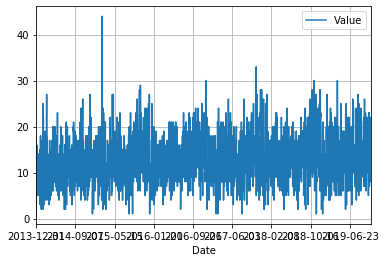

In [137]:
# Plot Data
update_df.plot(x='Date', y='Value', grid=True  )

''

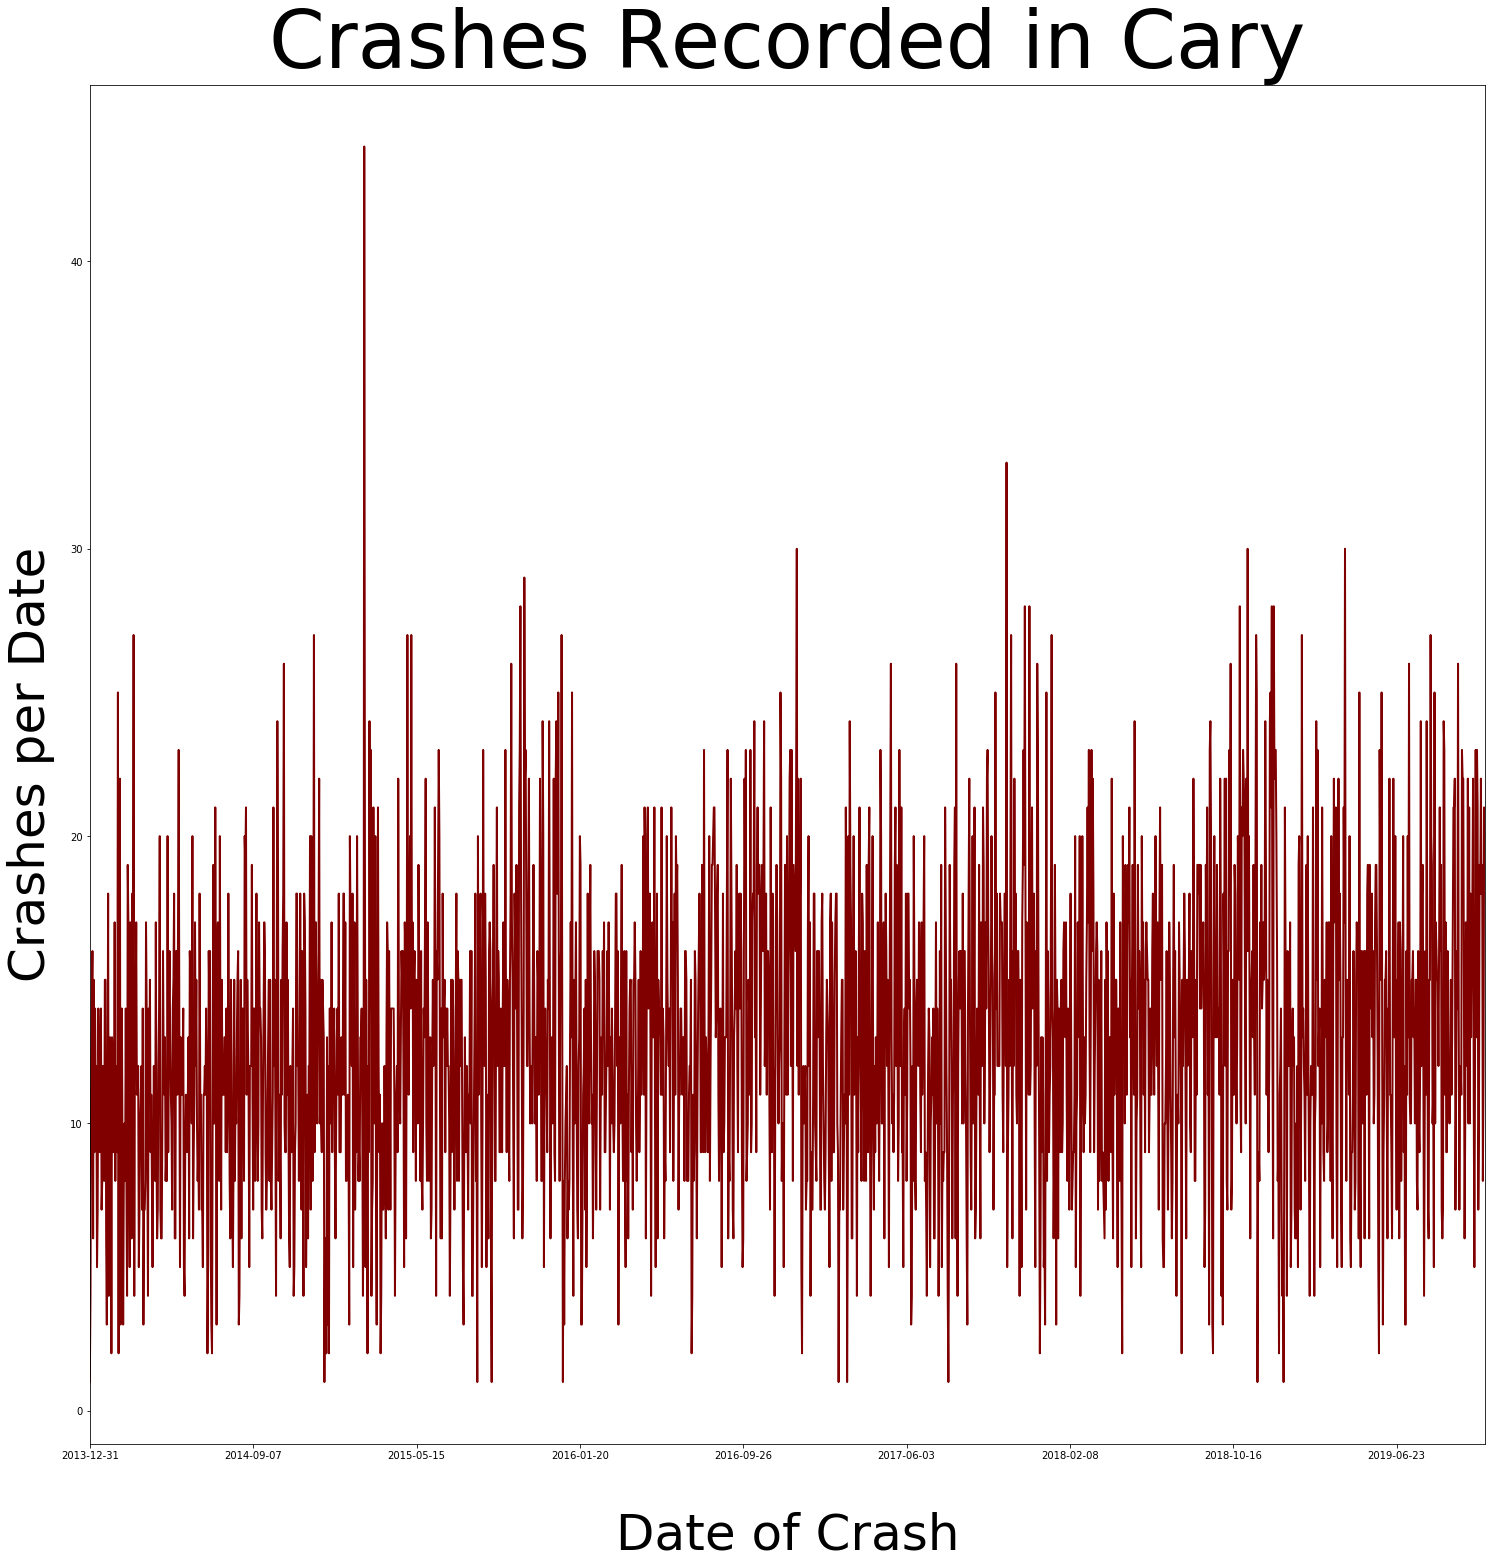

In [138]:
# Modify Text and Font Sizes
update_df.set_index('Date')['Value'].plot(figsize=(25, 25), linewidth=2, color='maroon')
plt.xlabel("Date of Crash", labelpad=50, fontsize=50)
plt.ylabel("Crashes per Date", labelpad=15, fontsize=50)
plt.title("Crashes Recorded in Cary", y=1, fontsize=80)
;